# Data Cleaning/Wrangling Example
### City of Charlotte Housing Data

The data was accessed from [Charlotte's Data Portal](https://data.charlottenc.gov/datasets/charlotte::housing-demand-and-availability-by-income/about) and its source is the [2018 American Community Survey (ACS)](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/ACS2014_2018_PUMS_README.pdf). 

It is a subset of the American Community Survery containing only data about Charlotte households. It contains features about households such a number of rooms, baths, etc. As well as information about those living in the houses such as income, number of children, and more.

In [1]:
!pip install pandas
!pip install matplotlib 
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Housing_Demand_and_Availability_by_Income.csv')

### Reading Data and Initial Exploration

In [4]:
df.head()

,OBJECTID,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,ACCESS,ACR,AGS,BATH,BDSP,BLD,BROADBND,COMPOTHX,CONP,DIALUP,ELEFP,ELEP,FS,FULFP,FULP,GASFP,GASP,HFL,HISPEED,HOTWAT,INSP,LAPTOP,MHP,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SATELLITE,SINK,SMARTPHONE,SMP,STOV,TABLET,TEL,TEN,VACS,VALP,VEH,WATFP,WATP,YBL,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHLANP,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PLMPRP,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SSMC,SVAL,TAXAMT,WIF,WKEXREL,WORKSTAT,FACCESSP,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBROADBNDP,FCOMPOTHXP,FCONP,FDIALUPP,FELEP,FFINCP,FFSP,FFULP,FGASP,FGRNTP,FHFLP,FHINCP,FHISPEEDP,FHOTWATP,FINSP,FKITP,FLAPTOPP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FOTHSVCEXP,FPLMP,FPLMPRP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSATELLITEP,FSINKP,FSMARTPHONP,FSMOCP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTABLETP,FTAXP,FTELP,FTENP,FVACSP,FVALP,FVEHP,FWATP,FYBLP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80,WGTP_CLT,AMI,AFF_OCC,AFF_VACS,COST_BURDALL,YEAR
0,1,H,2018HU0001431,5,3102,3,37,1000000,1013097,204,5,1,1.0,1.0,NaN,1,3,2,1.0,2.0,NaN,2.0,3.0,100.0,1.0,2.0,NaN,4.0,50.0,3.0,1.0,9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1,5,2.0,800.0,1,9,2.0,1,1.0,NaN,1,1.0,1.0,3.0,NaN,NaN,1.0,3.0,750.0,5,7.0,18000.0,3.0,1013.0,68.0,1.0,9500.0,3.0,18000.0,0.0,3.0,3.0,3.0,1,1.0,1.0,4.0,3.0,5.0,0.0,0.0,3.0,NaN,0.0,1,9,0.0,1.0,1.0,1.0,2,NaN,NaN,1,0.0,0,NaN,1.0,13.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,333,66,321,322,189,217,76,71,318,225,197,202,337,185,191,218,66,200,203,62,313,55,303,399,182,231,68,65,375,218,255,185,363,199,192,203,55,229,171,69,308,68,309,376,193,225,64,61,348,219,229,198,288,197,211,210,67,190,172,59,348,67,420,350,199,200,57,60,338,190,263,226,347,186,210,222,58,188,173,54,200.33,1.0,3.0,NaN,1.0,2018
1,2,H,2018HU0001750,5,3104,3,37,1000000,1013097,113,1,1,1.0,NaN,NaN,1,2,6,1.0,2.0,NaN,2.0,3.0,120.0,2.0,2.0,NaN,3.0,NaN,3.0,1.0,9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1,7,2.0,1100.0,1,9,2.0,1,1.0,NaN,1,1.0,1.0,3.0,NaN,NaN,1.0,3.0,40.0,6,NaN,NaN,NaN,1223.0,20.0,1.0,9500.0,4.0,72000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1,9,0.0,0.0,0.0,0.0,3,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,121,32,146,114,104,207,100,198,100,125,179,106,32,205,171,29,133,117,30,33,108,34,92,121,114,186,130,196,128,121,183,119,37,160,205,37,103,112,164,197,103,192,103,117,109,34,139,30,130,117,32,128,177,31,41,215,107,104,218,192,121,226,129,107,135,35,98,36,100,115,33,103,181,37,28,164,119,115,35,111.87,7.0,4.0,NaN,0.0,2018
2,3,H,2018HU0005740,5,3105,3,37,1000000,1013097,83,0,1,NaN,NaN,NaN,1,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2.0,450.0,1,9,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,NaN,NaN,NaN,NaN,2,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,82,86,138,79,128,84,81,84,26,87,26,87,88,25,82,151,25,24,141,135,81,79,135,87,146,82,81,79,23,82,25,83,75,25,78,132,25,22,26,22,77,85,23,81,24,78,80,79,131,81,143,82,80,139,85,27,138,137,26,24,84,82,25,89,26,85,83,80,143,83,141,83,81,142,77,23,151,149,136,81.51,NaN,2.0,2.0,NaN,2018
3,4,H,2018HU000

In [5]:
df.isna().any()

OBJECTID        False
RT              False
SERIALNO        False
DIVISION        False
PUMA            False
                ...  
AMI              True
AFF_OCC          True
AFF_VACS         True
COST_BURDALL     True
YEAR            False
Length: 241, dtype: bool

**Note**: The data is almost completely coded which makes it hard to understand without context. The Census Bureau has a data dictionary on their website which we can use to decode the values. The data dictionary simply tells us what each of the columns and their possible values mean. 

The PDF version of the data dictionary can be found [here](https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2014-2018.pdf)

Another side note is that the City of Charlotte added a few more [additional features](https://charlotte.maps.arcgis.com/sharing/rest/content/items/b9cb7f48017b4dd882bd8b75b0b736f9/data) to this dataset as follows:
- WGTP_CLT: Housing Unit Weight for City of Charlotte
- AMI: Area median income for the household
- AFF_OCC: The affordability of the rental housing unit
- AFF_VACS: The affordability level of the vancant rental housing unit.
- COST_BURDALL: Cost-burdened status of household
- YEAR: Year of the ACS PUMS data



In [6]:
data_dict = pd.read_csv('data_dictionary.csv').sort_index() 

In [7]:
data_dict.head()

NAME  RT                                                  C    1  \
NAME ACCESS    C   1                             Access to the Internet  NaN   
     ACR       C   1                                           Lot size  NaN   
     ADJHSG    C   7  Adjustment factor for housing dollar amounts (...  NaN   
     ADJINC    C   7  Adjustment factor for income and earnings doll...  NaN   
     ADJINC    C   7  Adjustment factor for income and earnings doll...  NaN   

            Record Type  
NAME ACCESS         NaN  
     ACR            NaN  
     ADJHSG         NaN  
     ADJINC         NaN  
     ADJINC         NaN

**Note**: The data dictionary uses [hierarchical indexing]('https://pandas.pydata.org/docs/user_guide/advanced.html'). 

### Defining some helper functions to help with value decoding

In [8]:
#features not includes in PUMS ACS Data Dictionary
CLT =  ['WGTP_CLT', 'AMI', 'AFF_OCC', 'AFF_VACS', 'COST_BURDALL', 'YEAR']

#Meanings of features added by Charlotte
CLT_FEAT = {
	'WGTP_CLT' : 'Housing Unit Weight for City of Charlotte', 
    'AMI' : 'Area Median Income for the household',
    'AFF_OCC' : 'The affordability level of the rental housing unit',
    'AFF_VACS' : 'The affordability level of the vacant housing unit',
    'COST_BURDALL' : 'Cost-burdened status of household',
    'YEAR' : 'Year of the ACS PUMS data'
}

# Meanings of the values of features added by Charlotte
CLT_VALUES = {
    'WGTP_CLT' : 'Integer weight of housing unit', 
    'AMI' : {
      	1: '30% and Below',
   	   	2: '31 to 50%',
   		3: '51 to 60%',
   		4: '61 to 80%',
   		5: '81 to 100%',
   	 	6: '101 to 120%',
    	7: 'Greater than 120%'          
    },
    'AFF_OCC' : {
        1: '30% and Below',
        2: '31 to 50%',
        3: '51 to 60%',
        4: '61 to 80%',
        5: '81 to 100%',
        6: '101 to 120%',
        7: 'Greater than 120%'
    },
    'AFF_VACS' : {
        1: '30% and Below',
        2: '31 to 50%',
        3: '51 to 60%',
        4: '61 to 80%',
        5: '81 to 100%',
        6: '101 to 120%',
        7: 'Greater than 120%'
    },
    'COST_BURDALL' : {
        0: 'No',
        1: 'Yes'
    },
    'YEAR' : 'Year of the ACS PUMS data'
}

#create dictionary for PUMA codes
PUMA_CODES = {
    3101 : "Charlotte City (Central)", 
    3102 : "Charlotte City (Northwest)", 
    3103 : "Charlotte City (Northeast)",
    3104 : "Charlotte City (South)",
    3105 : "Charlotte City (Southwest)", 
    3106 : "Mecklenburg County (North)--Huntersville, Cornelius & Davidson Towns",
    3107 : "Mecklenburg County (East)--Mint Hill & Matthews (North) Towns",
    3108 : "Mecklenburg County (South)--Matthews Town (South)",
    '3101' : "Charlotte City (Central)", 
    '3102' : "Charlotte City (Northwest)", 
    '3103' : "Charlotte City (Northeast)",
    '3104' : "Charlotte City (South)",
    '3105' : "Charlotte City (Southwest)", 
    '3106' : "Mecklenburg County (North)--Huntersville, Cornelius & Davidson Towns",
    '3107' : "Mecklenburg County (East)--Mint Hill & Matthews (North) Towns",
    '3108' : "Mecklenburg County (South)--Matthews Town (South)"
}


def get_feat(feat):
    '''
    Look up the semantics of a feature name

        Parameters:
            feat (str): name of column/feature
        Returns:
            data description (str)
    '''
    try:
        if feat not in CLT:
            if feat == 'Cluster':
                desc = 'Cluster'
            elif feat == 'HHLANP':
                desc = 'Household language'
            else:
                desc = data_dict.loc['NAME', feat]['C'][0]
        else:
            desc = CLT_FEAT[feat]
    except: 
        return '***LOOK UP FAILED***'
    else:
        return desc


def get_value(feat, value):
    '''
    Look up the semantics of a specified value of a feature

        Parameters:
            feat (str): name of column/feature
            value (str): particular value within column
        Returns:
            data description (str)
    '''
    try:
        if feat == 'PUMA':
            desc = PUMA_CODES[value]
        elif feat not in CLT:
            subset = data_dict.loc['VAL', feat]
            desc = subset[subset['C'] == value]['Record Type'][0]
        else: 
            desc = CLT_VALUES[feat][value]
        
    except:
        return '***LOOK UP FAILED***'
    else:
        return desc
    

def get_values(feat):
    '''
    Look up all values and their semantics of a feature

        Parameters:
            feat (str): name of column/feature
        Returns:
            feature desc
            values desc data description (pandas.DataFrame)
    '''
    try:
        if feat == 'Cluster':
            name = 'Cluster',
            desc = 'Cluster'
        if feat not in CLT:
            name = data_dict.loc['NAME', feat]['C'][0]
            subset = data_dict.loc['VAL', feat]
            desc = subset[['C', 'Record Type']]
            desc = desc.reset_index().drop(columns = ['level_0', 'level_1']).rename(columns = {'C':'Value'})
        else: 
            name = CLT_FEAT[feat]
            desc = CLT_VALUES[feat]
    except:
        return '***LOOK UP FAILED***'
    else:
        return name, desc
    

In [9]:
df.head()

,OBJECTID,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,TYPE,ACCESS,ACR,AGS,BATH,BDSP,BLD,BROADBND,COMPOTHX,CONP,DIALUP,ELEFP,ELEP,FS,FULFP,FULP,GASFP,GASP,HFL,HISPEED,HOTWAT,INSP,LAPTOP,MHP,MRGI,MRGP,MRGT,MRGX,OTHSVCEX,REFR,RMSP,RNTM,RNTP,RWAT,RWATPR,SATELLITE,SINK,SMARTPHONE,SMP,STOV,TABLET,TEL,TEN,VACS,VALP,VEH,WATFP,WATP,YBL,FES,FINCP,FPARC,GRNTP,GRPIP,HHL,HHLANP,HHT,HINCP,HUGCL,HUPAC,HUPAOC,HUPARC,KIT,LNGI,MULTG,MV,NOC,NPF,NPP,NR,NRC,OCPIP,PARTNER,PLM,PLMPRP,PSF,R18,R60,R65,RESMODE,SMOCP,SMX,SRNT,SSMC,SVAL,TAXAMT,WIF,WKEXREL,WORKSTAT,FACCESSP,FACRP,FAGSP,FBATHP,FBDSP,FBLDP,FBROADBNDP,FCOMPOTHXP,FCONP,FDIALUPP,FELEP,FFINCP,FFSP,FFULP,FGASP,FGRNTP,FHFLP,FHINCP,FHISPEEDP,FHOTWATP,FINSP,FKITP,FLAPTOPP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FMVP,FOTHSVCEXP,FPLMP,FPLMPRP,FREFRP,FRMSP,FRNTMP,FRNTP,FRWATP,FRWATPRP,FSATELLITEP,FSINKP,FSMARTPHONP,FSMOCP,FSMP,FSMXHP,FSMXSP,FSTOVP,FTABLETP,FTAXP,FTELP,FTENP,FVACSP,FVALP,FVEHP,FWATP,FYBLP,WGTP1,WGTP2,WGTP3,WGTP4,WGTP5,WGTP6,WGTP7,WGTP8,WGTP9,WGTP10,WGTP11,WGTP12,WGTP13,WGTP14,WGTP15,WGTP16,WGTP17,WGTP18,WGTP19,WGTP20,WGTP21,WGTP22,WGTP23,WGTP24,WGTP25,WGTP26,WGTP27,WGTP28,WGTP29,WGTP30,WGTP31,WGTP32,WGTP33,WGTP34,WGTP35,WGTP36,WGTP37,WGTP38,WGTP39,WGTP40,WGTP41,WGTP42,WGTP43,WGTP44,WGTP45,WGTP46,WGTP47,WGTP48,WGTP49,WGTP50,WGTP51,WGTP52,WGTP53,WGTP54,WGTP55,WGTP56,WGTP57,WGTP58,WGTP59,WGTP60,WGTP61,WGTP62,WGTP63,WGTP64,WGTP65,WGTP66,WGTP67,WGTP68,WGTP69,WGTP70,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80,WGTP_CLT,AMI,AFF_OCC,AFF_VACS,COST_BURDALL,YEAR
0,1,H,2018HU0001431,5,3102,3,37,1000000,1013097,204,5,1,1.0,1.0,NaN,1,3,2,1.0,2.0,NaN,2.0,3.0,100.0,1.0,2.0,NaN,4.0,50.0,3.0,1.0,9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1,5,2.0,800.0,1,9,2.0,1,1.0,NaN,1,1.0,1.0,3.0,NaN,NaN,1.0,3.0,750.0,5,7.0,18000.0,3.0,1013.0,68.0,1.0,9500.0,3.0,18000.0,0.0,3.0,3.0,3.0,1,1.0,1.0,4.0,3.0,5.0,0.0,0.0,3.0,NaN,0.0,1,9,0.0,1.0,1.0,1.0,2,NaN,NaN,1,0.0,0,NaN,1.0,13.0,13.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,333,66,321,322,189,217,76,71,318,225,197,202,337,185,191,218,66,200,203,62,313,55,303,399,182,231,68,65,375,218,255,185,363,199,192,203,55,229,171,69,308,68,309,376,193,225,64,61,348,219,229,198,288,197,211,210,67,190,172,59,348,67,420,350,199,200,57,60,338,190,263,226,347,186,210,222,58,188,173,54,200.33,1.0,3.0,NaN,1.0,2018
1,2,H,2018HU0001750,5,3104,3,37,1000000,1013097,113,1,1,1.0,NaN,NaN,1,2,6,1.0,2.0,NaN,2.0,3.0,120.0,2.0,2.0,NaN,3.0,NaN,3.0,1.0,9,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,1,7,2.0,1100.0,1,9,2.0,1,1.0,NaN,1,1.0,1.0,3.0,NaN,NaN,1.0,3.0,40.0,6,NaN,NaN,NaN,1223.0,20.0,1.0,9500.0,4.0,72000.0,0.0,4.0,4.0,4.0,1,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,1,9,0.0,0.0,0.0,0.0,3,NaN,NaN,1,0.0,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38,121,32,146,114,104,207,100,198,100,125,179,106,32,205,171,29,133,117,30,33,108,34,92,121,114,186,130,196,128,121,183,119,37,160,205,37,103,112,164,197,103,192,103,117,109,34,139,30,130,117,32,128,177,31,41,215,107,104,218,192,121,226,129,107,135,35,98,36,100,115,33,103,181,37,28,164,119,115,35,111.87,7.0,4.0,NaN,0.0,2018
2,3,H,2018HU0005740,5,3105,3,37,1000000,1013097,83,0,1,NaN,NaN,NaN,1,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,2.0,450.0,1,9,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,NaN,NaN,NaN,NaN,2,NaN,NaN,1,NaN,0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,82,86,138,79,128,84,81,84,26,87,26,87,88,25,82,151,25,24,141,135,81,79,135,87,146,82,81,79,23,82,25,83,75,25,78,132,25,22,26,22,77,85,23,81,24,78,80,79,131,81,143,82,80,139,85,27,138,137,26,24,84,82,25,89,26,85,83,80,143,83,141,83,81,142,77,23,151,149,136,81.51,NaN,2.0,2.0,NaN,2018
3,4,H,2018HU000

### Function Usage

In [10]:
# eg. What does the feature ADJINC mean?
get_feat('ADJINC')

'Adjustment factor for income and earnings dollar amounts (6 implied decimal places)'

In [11]:
# eg. What do the values in the NP column mean?
get_values('NP')

('Number of persons associated with this housing record',
   Value                                        Record Type
 0     0                                        Vacant unit
 1     1  One person record (one person in household or ...
 2     2  Number of person records (number of persons in...)

In [12]:
# eg. What does 3.0 mean in the ELEFP column?
get_value('ELEFP', '2')

'No charge or electricity not used'

### Data Cleaning

In [13]:
#check columns that only contain a single unique value
redudant = []
for col in df.columns:
    if len(df[col].unique()) == 1:
          redudant.append(col)
            
#see the semantics of the redundant columns
for i in redudant:
    print(i, ':', get_feat(i))

RT : Record Type
DIVISION : Division code based on 2010 Census definitions
REGION : Region code based on 2010 Census definitions
ST : State code based on 2010 Census definitions
ADJHSG : Adjustment factor for housing dollar amounts (6 implied decimal places)
ADJINC : Adjustment factor for income and earnings dollar amounts (6 implied decimal places)
TYPE : Type of unit
CONP : Condo fee (monthly amount, use ADJHSG to adjust CONP to constant dollars)
HOTWAT : Water heater (Puerto Rico only)
INSP : Fire/hazard/flood insurance (yearly amount, use ADJHSG to adjust INSP to constant dollars)
MHP : Mobile home costs (yearly amount, use ADJHSG to adjust MHP to constant dollars)
MRGI : First mortgage payment includes fire/hazard/flood insurance
MRGP : First mortgage payment (monthly amount, use ADJHSG to adjust MRGP to constant dollars)
MRGT : First mortgage payment includes real estate taxes
MRGX : First mortgage status
RWATPR : Running water
SMP : Total payment on all second and junior mortgag

In [14]:
df[redudant].head()

,RT,DIVISION,REGION,ST,ADJHSG,ADJINC,TYPE,CONP,HOTWAT,INSP,MHP,MRGI,MRGP,MRGT,MRGX,RWATPR,SMP,OCPIP,PLMPRP,SMOCP,SMX,TAXAMT,FCONP,FHOTWATP,FINSP,FMHP,FMRGIP,FMRGP,FMRGTP,FMRGXP,FPLMPRP,FRWATPRP,FSMOCP,FSMP,FSMXHP,FSMXSP,FTAXP,YEAR
0,H,5,3,37,1000000,1013097,1,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018
1,H,5,3,37,1000000,1013097,1,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018
2,H,5,3,37,1000000,1013097,1,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018
3,H,5,3,37,1000000,1013097,1,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018
4,H,5,3,37,1000000,1013097,1,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,9,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018


**Note:** A lot of the redudant features are regional data. Remember, all of this data comes from a national survey and our specific subset is specific to Charlotte. Beyond that, the rest of the data is empty.

In [15]:
#drop redudant features, new dataframe
df_cleaned = df.drop(columns = redudant)

In [16]:
df_cleaned.shape

(1754, 203)

In [17]:
#overview semantics of remaining columns
for col in df_cleaned.columns:
    print(col, ' ', get_feat(col))

OBJECTID   ***LOOK UP FAILED***
SERIALNO   Housing unit/GQ person serial number
PUMA   Public use microdata area code (PUMA) based on 2010 Census definition (areas with population of 100,000 or more, use with ST for unique code)
WGTP   Housing Unit Weight
NP   Number of persons associated with this housing record
ACCESS   Access to the Internet
ACR   Lot size
AGS   Sales of agriculture products (yearly sales, no adjustment factor is applied)
BATH   Bathtub or shower
BDSP   Number of bedrooms
BLD   Units in structure
BROADBND   Cellular data plan for a smartphone or other mobile device
COMPOTHX   Other computer equipment
DIALUP   Dial-up service
ELEFP   Electricity cost flag variable
ELEP   Electricity cost (monthly cost, use ADJHSG to adjust ELEP to constant dollars)
FS   Yearly food stamp/Supplemental Nutrition Assistance Program (SNAP) recipiency
FULFP   Fuel cost flag variable
FULP   Fuel cost (yearly cost for fuels other than gas and electricity, use ADJHSG to adjust FULP to consta

In [18]:
''' Dropping some more features '''

#drop unique identifier
#drop allocation features by parsing their definition
#drop sample weight columns
to_drop = []
for col in df_cleaned.columns:
    desc = get_feat(col)
    if 'allocation' in desc.lower():
        to_drop.append(col)
    if "WGTP" in col:
        to_drop.append(col)
to_drop = to_drop + ['OBJECTID', 'SERIALNO']
df_cleaned = df_cleaned.drop(columns = to_drop)

df_cleaned.shape     

(1754, 79)

In [19]:
#get nulls by ROW
high_nulls_df = df_cleaned.loc[df_cleaned.isnull().sum(axis = 1) > 40]

In [20]:
#Are rows with more nulls vacant?
high_nulls_df.VACS.value_counts()

1.0    82
7.0    57
5.0    22
2.0    22
3.0    20
4.0     9
Name: VACS, dtype: int64

In [21]:
high_nulls_df.VACS.value_counts().sum()

212

In [22]:
high_nulls_df.shape

(212, 79)

**Note:** As we can see, all of the rows with high amounts of nulls are all vacant, which makes sense. 

In [23]:
#Separate vacant households into their own df
df_vacant = df_cleaned.loc[~df_cleaned.VACS.isna()]
df_cleaned = df_cleaned.loc[df_cleaned.VACS.isna()]

In [24]:
df_cleaned.shape

(1542, 79)

In [25]:
#drop redudant columns again
#check columns that only contain a single unique value
to_drop = []
rows = len(df_cleaned)
for col in df_cleaned.columns:
    #drop redudant columns
    if len(df_cleaned[col].unique()) == 1:
          to_drop.append(col)
    #drop columns with many (greater than 500) nulls
    if df_cleaned[col].isna().sum() > 500:
        to_drop.append(col)
df_cleaned = df_cleaned.drop(columns = to_drop)
df_cleaned.shape

(1542, 63)

In [26]:
df_cleaned.PUMA.value_counts()

3101    334
3105    254
3102    206
3103    184
3104    157
3106    147
3108    145
3107    115
Name: PUMA, dtype: int64

**NOTE:** PUMA (Public Use Microdata Area) attribute contains codes that correspond to an geographic area. This dataset contains 8 Different codes that are all within North Carolina.

- 3101 : Charlotte City (Central) 
- 3102 : Charlotte City (Northwest) 
- 3103 : Charlotte City (Northeast) 
- 3104 : Charlotte City (South) 
- 3105 : Charlotte City (Southwest)
- 3106 : Mecklenburg County (North)--Huntersville, Cornelius & Davidson Towns 
- 3107 : Mecklenburg County (East)--Mint Hill & Matthews (North) Towns 
- 3108 : Mecklenburg County (South)--Matthews Town (South) 

In [27]:
PUMA_CODES[3101]

'Charlotte City (Central)'

### Thoughts so far
There is tons of valuable data within the columns and potential for tons of data exploration and insight. However with all this data, manual inspection can be a bit more tedious. After lots of referencing of ACS PUMS documentation and a bit of exploration of distributions of some features, here are my thoughts:

I do not fully understand the **weight** features (Ex: WGTP*) . I assume they are there to assist in some type of regression analysis or other modeling. But I don't think they are necessary for visualizations. I think I will separate them for now. [Reference](https://www.census.gov/content/dam/Census/library/publications/2020/acs/acs_pums_handbook_2020_ch04.pdf)

The **flag variables** are interesting as well. Some features take on a quantitative value (such as water cost) but also have a categorical flag variable to represent when it is either not applicable or zero. I need to explore if its worth trying to combine these into a single feature or just drop altogether.

There is also **allocation flag** variables. From what I can tell, these flags are raised when the value for their corresponding features are inferred of imputed in some way. I *think* these really won't be needed for modeling or visuals. They probably are meant to reflect validity of the data. [Reference](https://www.census.gov/programs-surveys/acs/methodology/sample-size-and-data-quality/item-allocation-rates-definitions.html)

I'm going to go ahead and drop the unique identifiers **(OBJECTID, SERIALNO)** as they won't be needed for our purposes.

The affordability data provided by charlotte can be treated as "target values" for modeling and correlations.  

### Exploration

In [28]:
sns.set(rc={"figure.figsize":(25,20)})

<AxesSubplot:>

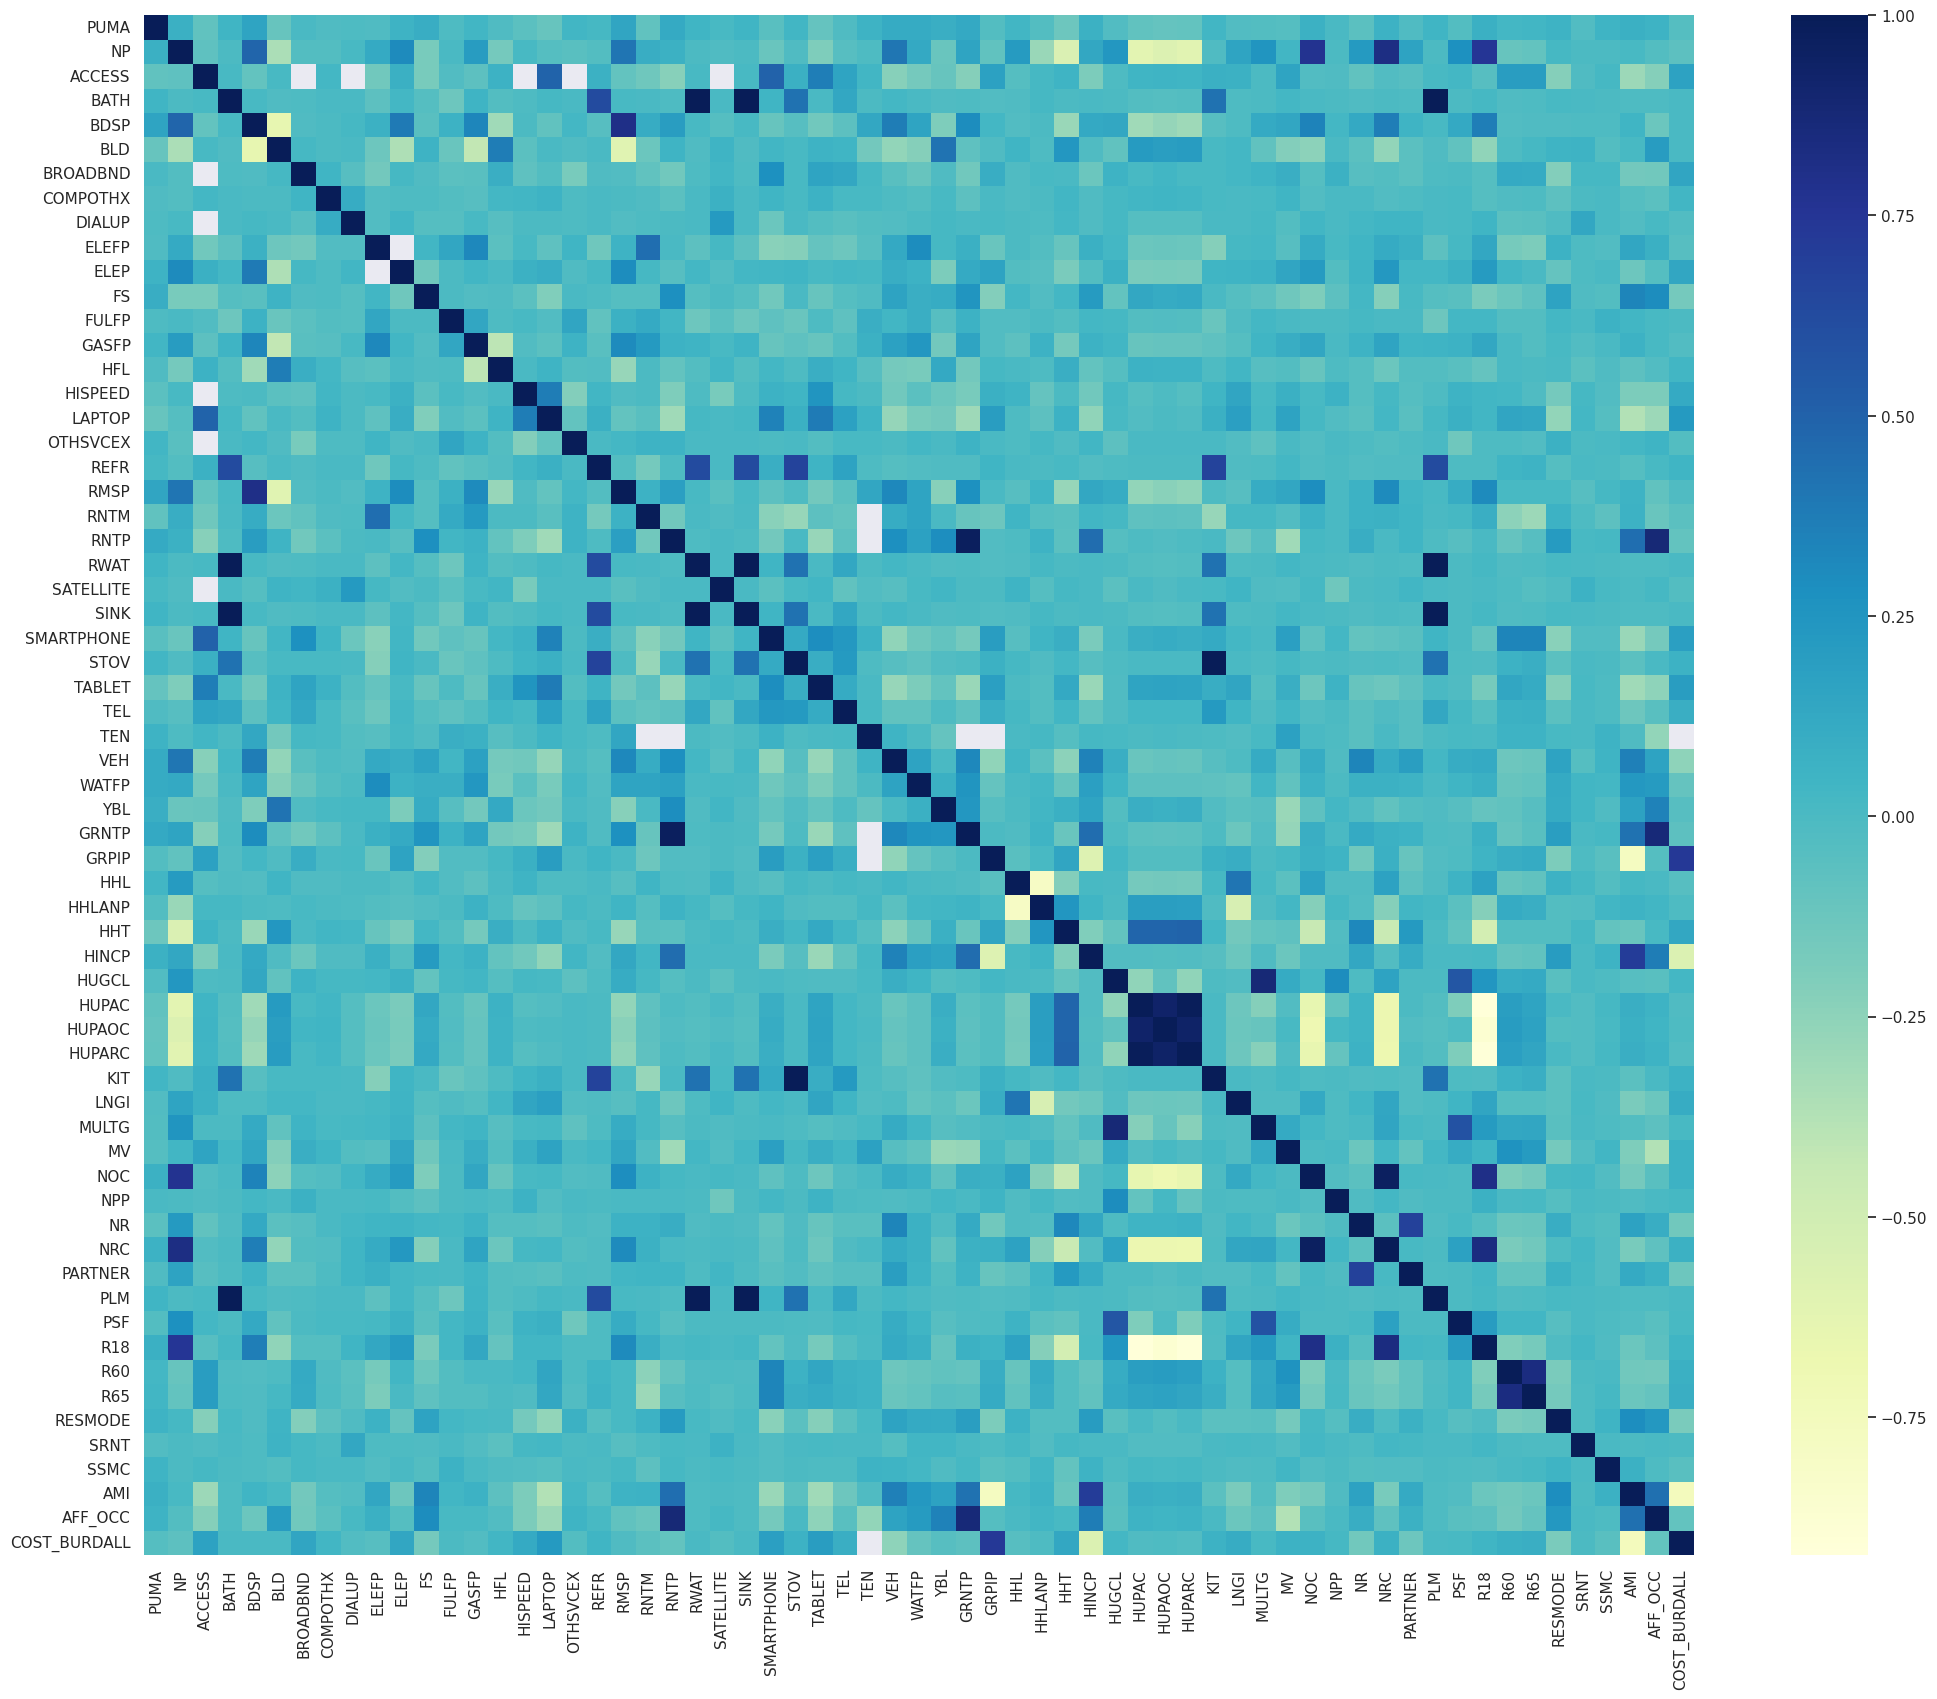

In [29]:
correlations = df_cleaned.corr()
sns.heatmap(correlations, cmap="YlGnBu", annot=False)

We can see pockets of multi-collinearity

In [30]:
#Creating a dictionary of columns with high correlations 
corr_array = correlations.to_numpy()
high_corr = {}
cols = df_cleaned.columns

for i in range(len(corr_array)):
    temp = list(np.where(corr_array[i] > 0.70)[0])
    if len(temp) < 2:
        continue
    temp.pop(temp.index(i))
    high_corr[cols[i]] = list(cols[temp])

In [31]:
high_corr

{'NP': ['NOC', 'NRC', 'R18'],
 'BATH': ['RWAT', 'SINK', 'PLM'],
 'BDSP': ['RMSP'],
 'RMSP': ['BDSP'],
 'RNTP': ['GRNTP', 'AFF_OCC'],
 'RWAT': ['BATH', 'SINK', 'PLM'],
 'SINK': ['BATH', 'RWAT', 'PLM'],
 'STOV': ['KIT'],
 'GRNTP': ['RNTP', 'AFF_OCC'],
 'GRPIP': ['COST_BURDALL'],
 'HINCP': ['AMI'],
 'HUGCL': ['MULTG'],
 'HUPAC': ['HUPAOC', 'HUPARC'],
 'HUPAOC': ['HUPAC', 'HUPARC'],
 'HUPARC': ['HUPAC', 'HUPAOC'],
 'KIT': ['STOV'],
 'MULTG': ['HUGCL'],
 'NOC': ['NP', 'NRC', 'R18'],
 'NRC': ['NP', 'NOC', 'R18'],
 'PLM': ['BATH', 'RWAT', 'SINK'],
 'R18': ['NP', 'NOC', 'NRC'],
 'R60': ['R65'],
 'R65': ['R60'],
 'AMI': ['HINCP'],
 'AFF_OCC': ['RNTP', 'GRNTP'],
 'COST_BURDALL': ['GRPIP']}

In [32]:
#Get actual correlation value and decide which to drop
for i in high_corr:
    print(i+' correlates with:')
    print(correlations.loc[i][high_corr[i]])
    print('-------------------------------')

NP correlates with:
NOC    0.773397
NRC    0.824704
R18    0.748666
Name: NP, dtype: float64
-------------------------------
BATH correlates with:
RWAT    1.0
SINK    1.0
PLM     1.0
Name: BATH, dtype: float64
-------------------------------
BDSP correlates with:
RMSP    0.810783
Name: BDSP, dtype: float64
-------------------------------
RMSP correlates with:
BDSP    0.810783
Name: RMSP, dtype: float64
-------------------------------
RNTP correlates with:
GRNTP      0.975929
AFF_OCC    0.876813
Name: RNTP, dtype: float64
-------------------------------
RWAT correlates with:
BATH    1.0
SINK    1.0
PLM     1.0
Name: RWAT, dtype: float64
-------------------------------
SINK correlates with:
BATH    1.0
RWAT    1.0
PLM     1.0
Name: SINK, dtype: float64
-------------------------------
STOV correlates with:
KIT    1.0
Name: STOV, dtype: float64
-------------------------------
GRNTP correlates with:
RNTP       0.975929
AFF_OCC    0.865431
Name: GRNTP, dtype: float64
------------------------

- After inspects the high correlating features, I've manually compiled a list of ones to drop
- Also target features were likely derived from existing features. 
    - AFF_OCC: 'RNTP', 'GRNTP'
    - COST_BURDALL: 'GRPIP'
    - AMI: 'HINCP'


In [33]:
to_drop = ['RWAT', 'SINK', 'PLM', 'GRNTP', 'STOV', 'HUGCL', 'HUPAOC', 'HUPARC', 'NRC', 'R60']
df_cleaned.drop(columns = to_drop, inplace = True)

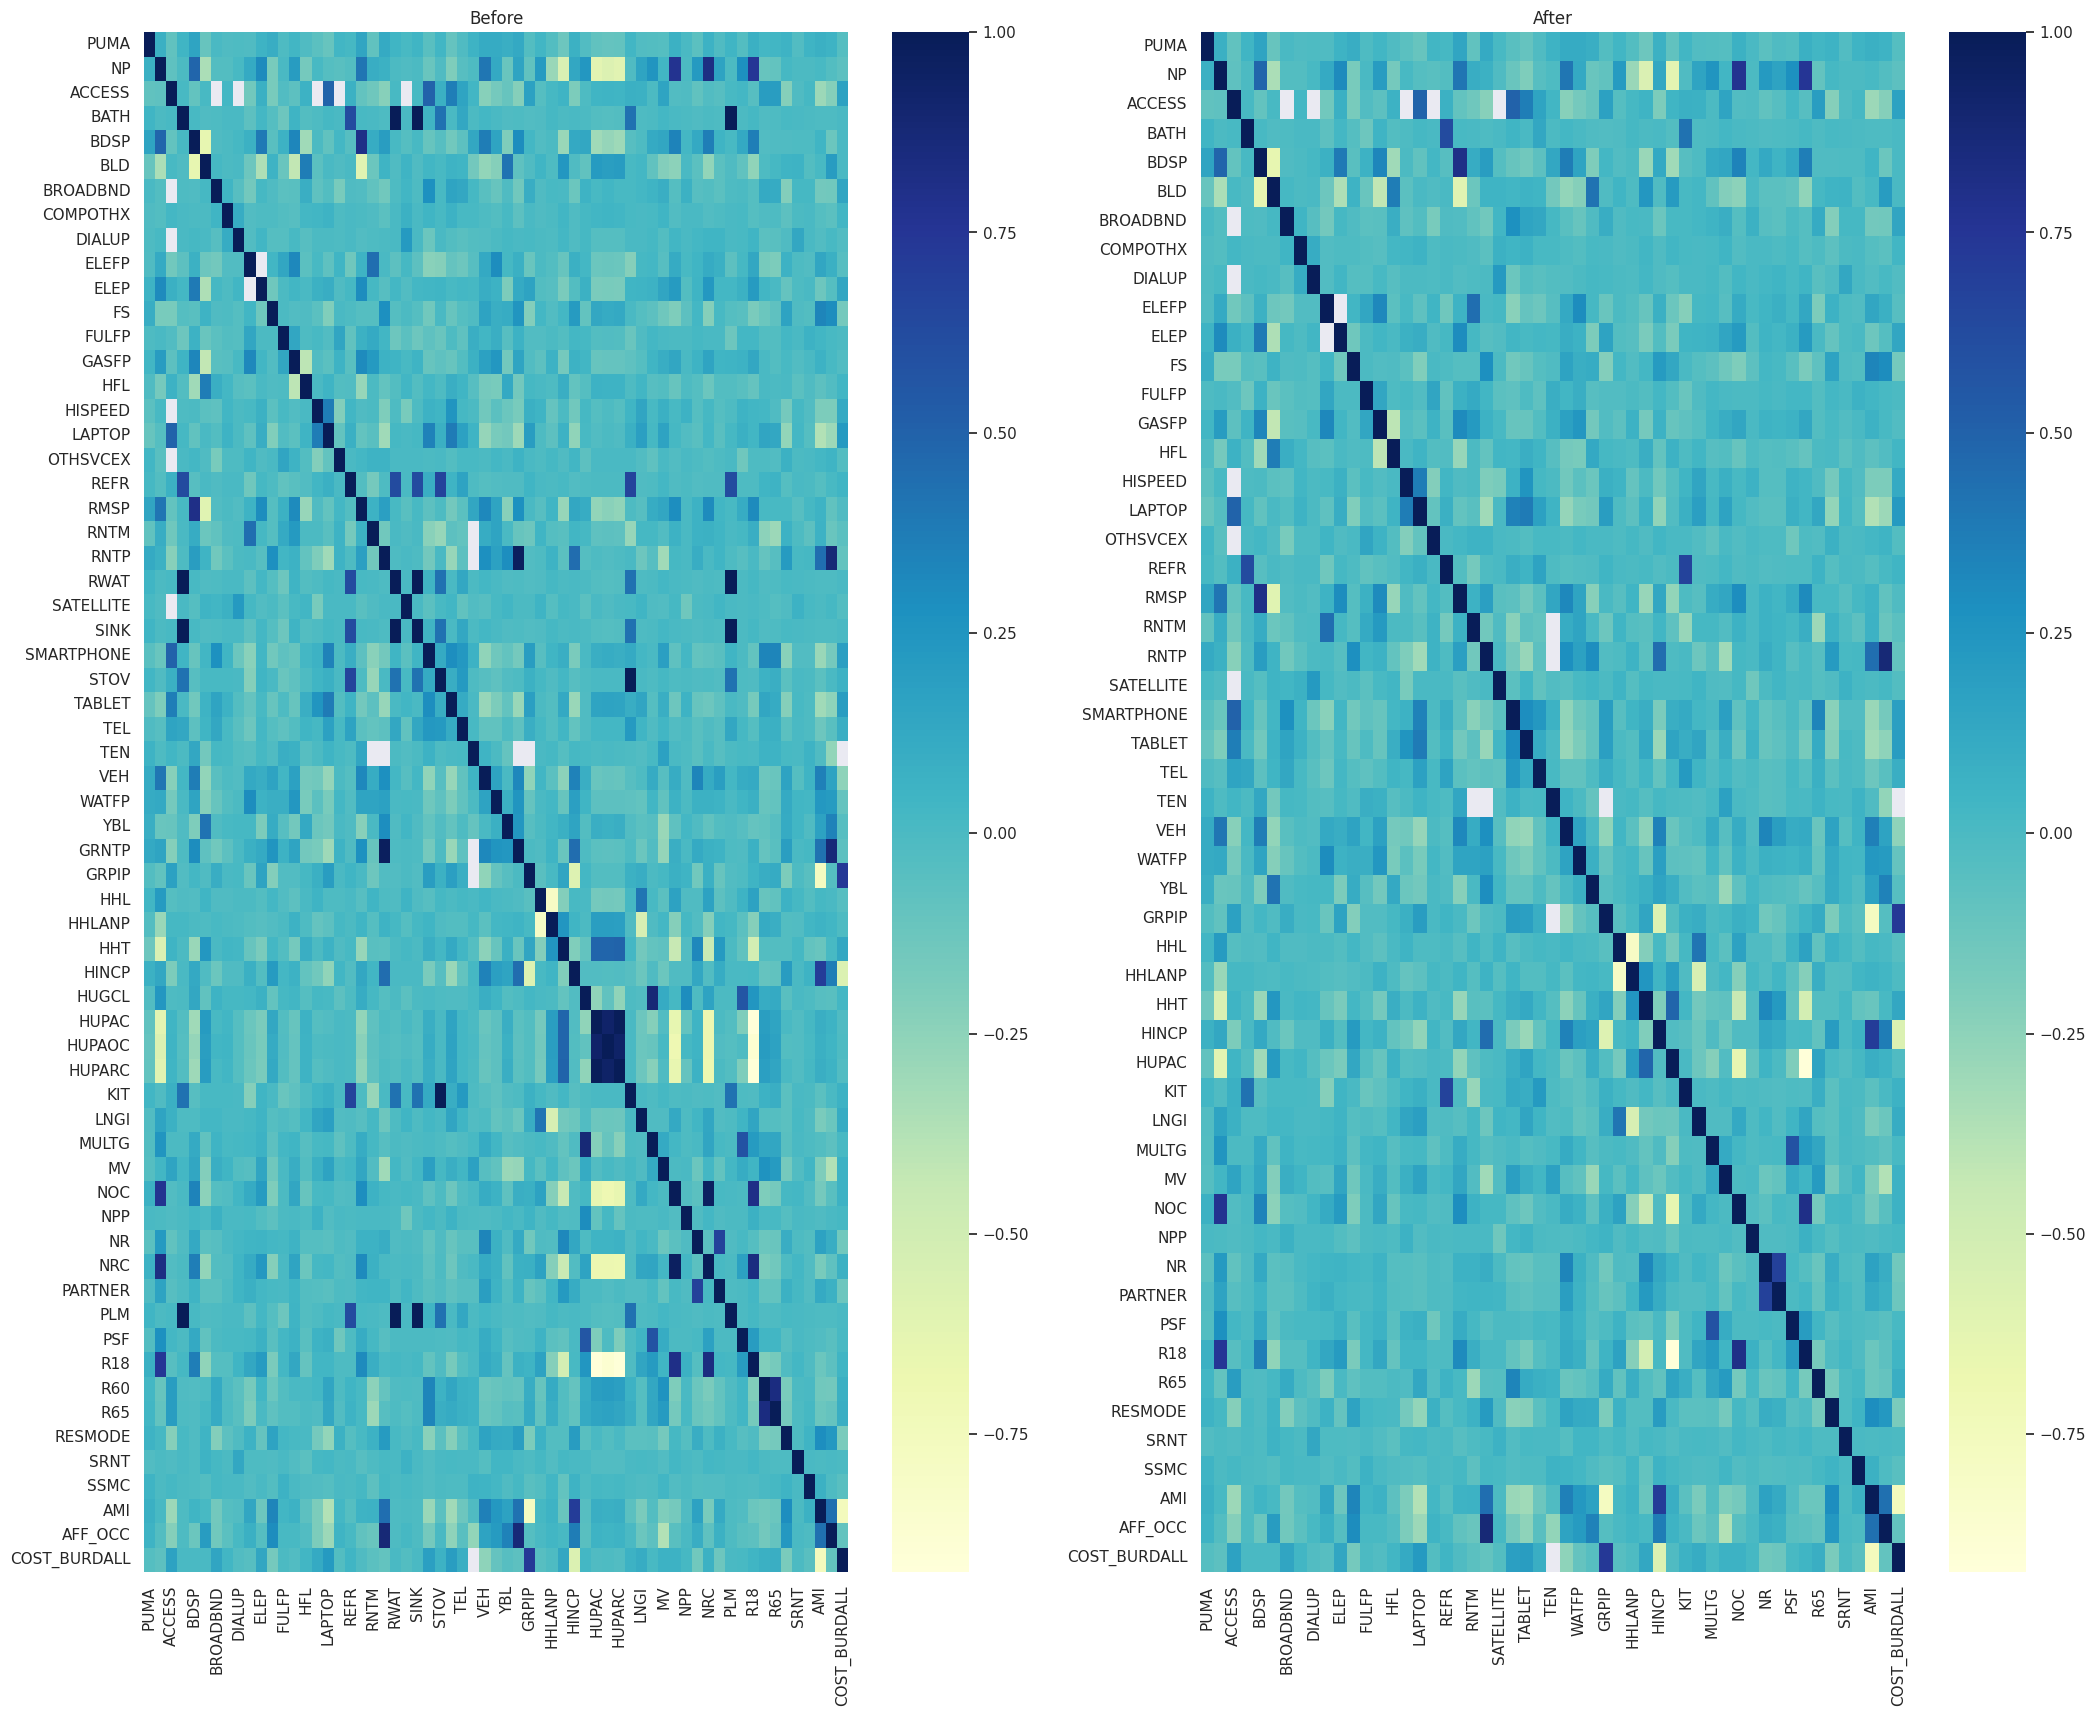

In [34]:
correlations2 = df_cleaned.corr()
fig, (ax1, ax2) = plt.subplots(1,2)
sns.heatmap(correlations, cmap="YlGnBu", annot=False, ax=ax1).set(title = 'Before')
sns.heatmap(correlations2, cmap="YlGnBu", annot=False, ax=ax2).set(title = 'After')
plt.show()

### Cleaning Recap
- Redudant (columns of only a single value) were dropped
- Flag Columns were dropped
- Weight columns were dropped (may need to revisit for modeling)
- Vacant households were dropped 
- Unique identifiers were dropped
- Nulls were filled with average
- Fixing multi-collinearity

I believe that is all that is necessary for initial cleaning. Further rearrangement/processing will be needed depending on model implementation.

### Selecting only a few columns for demo purposes

In [35]:
df_demo = df_cleaned[['TEN', 'NP', 'NOC', 'HHT', 'LNGI', 'ELEP', 'VEH', 'HINCP', 'RNTP', 'PUMA', 'COST_BURDALL', 'RMSP']]

In [36]:
df_demo = df_demo.dropna(axis=0)

In [37]:
df_demo

,TEN,NP,NOC,HHT,LNGI,ELEP,VEH,HINCP,RNTP,PUMA,COST_BURDALL,RMSP
0,3.0,5,3.0,3.0,1.0,100.0,1.0,18000.0,800.0,3102,1.0,5
1,3.0,1,0.0,4.0,1.0,120.0,1.0,72000.0,1100.0,3104,0.0,7
3,3.0,2,0.0,1.0,1.0,170.0,2.0,56600.0,600.0,3101,0.0,5
4,3.0,4,2.0,1.0,1.0,80.0,2.0,59400.0,800.0,3105,0.0,6
5,3.0,1,0.0,4.0,1.0,30.0,1.0,160000.0,1400.0,3101,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1749,3.0,2,0.0,1.0,1.0,170.0,3.0,204100.0,1800.0,3108,0.0,8
1750,3.0,4,2.0,1.0,1.0,90.0,1.0,42000.0,850.0,3107,0.0,8
1751,3.0,2,0.0,5.0,1.0,80.0,2.0,86000.0,1300.0,3101,0.0,2
1752,3.0,1,0.0,6.0,1.0,110.0,1.0,35100.0,720.0,3101,0.0,3


In [38]:
get_values('TEN')

('Tenure',
   Value                                        Record Type
 0     b                                    N/A (GQ/vacant)
 1     1  Owned with mortgage or loan (include home equi...
 2     2                               Owned free and clear
 3     3                                             Rented
 4     4                   Occupied without payment of rent)

In [39]:
get_value('TEN', '3')

'Rented'

In [40]:
for col in ['TEN', 'HHT', 'PUMA']:
    df_demo[col] = df_demo[col].apply(lambda x: get_value( col, str(int(x)) )) 

In [41]:
df_demo.to_csv('clt_housing_cleaned.csv', index=False)